<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #000d2aff, #0f1d3aff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 4 Day 21/8
    </h1>
</div>


<h4 style="color:#002f94ff">1. Importing Required Libraries for Building and Training Neural Networks with TensorFlow and Keras</h4>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h4 style="color:#002f94ff">2. Downloading and Extracting the Flower Photos Dataset and Setting the Data Directory Path</h4>

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 149s 1us/step


<h4 style="color:#002f94ff">3. Counting the Total Number of Images in the Flower Photos Dataset</h4>

In [ ]:
data_dir = pathlib.Path(data_dir) / "flower_photos"
print(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

C:\Users\Rammah\.keras\datasets\flower_photos\flower_photos
3670


<h4 style="color:#002f94ff">4. Opening and Displaying the First Rose Image from the Flower Photos Dataset</h4>

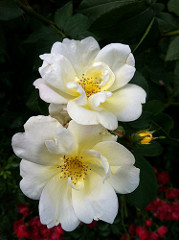

In [15]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

<h4 style="color:#002f94ff">5. Displaying the Second Rose Image from the Flower Photos Dataset</h4>

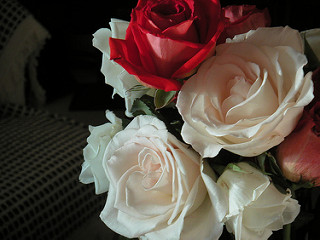

In [16]:
PIL.Image.open(str(roses[1]))

<h4 style="color:#002f94ff">6. Displaying the First Tulip Image from the Flower Photos Dataset</h4>

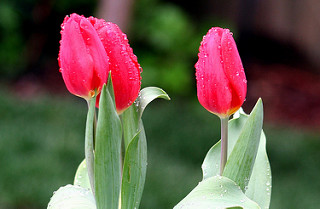

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h4 style="color:#002f94ff">7. Displaying the Second Tulip Image from the Flower Photos Dataset</h4>

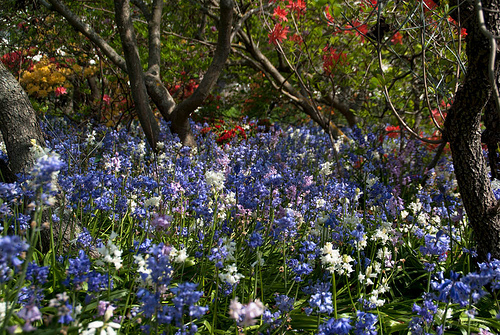

In [18]:
PIL.Image.open(str(tulips[1]))

<h4 style="color:#002f94ff">8. Defining Batch Size and Image Dimensions for Data Preprocessing</h4>

In [19]:
batch_size = 32
img_height = 180
img_width = 180

<h4 style="color:#002f94ff">9. Creating the Training Dataset from the Flower Photos Directory with 80-20 Split</h4>

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


<h4 style="color:#002f94ff">10. Creating the Validation Dataset from the Flower Photos Directory with 20% Split</h4>

In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


<h4 style="color:#002f94ff">11. Retrieving and Displaying Class Names from the Training Dataset</h4>

In [22]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


<h4 style="color:#002f94ff">12. Visualizing Sample Images with Labels from the Training Dataset</h4>

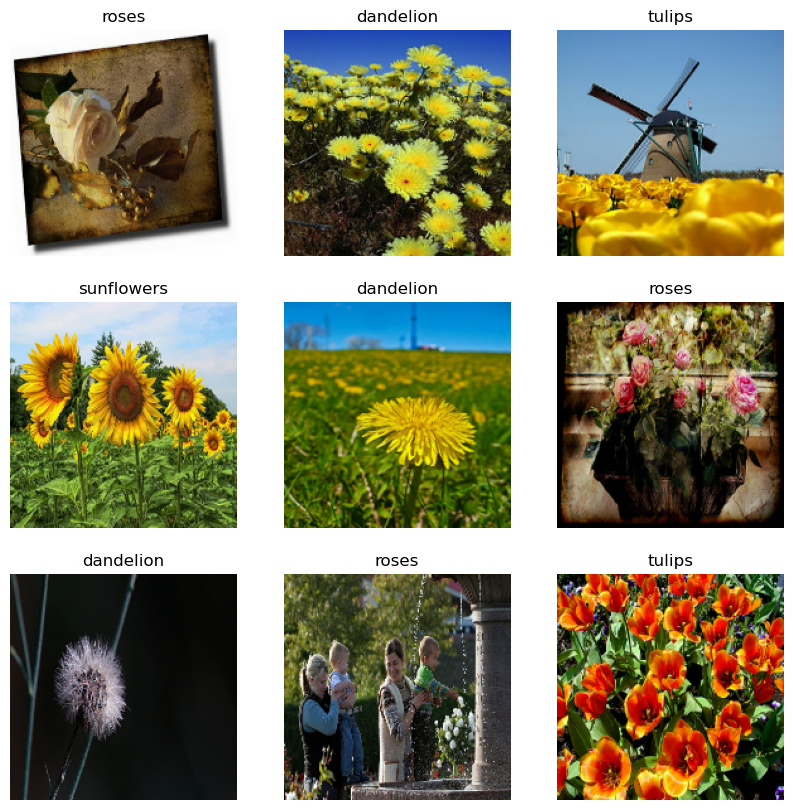

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

<h4 style="color:#002f94ff">13. Inspecting the Shape of Image and Label Batches from the Training Dataset</h4>

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


<h4 style="color:#002f94ff">14. Configuring Dataset Performance with Caching, Shuffling, and Prefetching</h4>

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<h4 style="color:#002f94ff">15. Creating a Normalization Layer to Rescale Pixel Values to [0,1]</h4>

In [26]:
normalization_layer = layers.Rescaling(1./255)

<h4 style="color:#002f94ff">16. Applying Normalization to the Training Dataset and Checking Pixel Value Range</h4>

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


<h4 style="color:#002f94ff">17. Building a Sequential CNN Model for Flower Classification with Convolution, Pooling, and Dense Layers</h4>

In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\Rammah\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h4 style="color:#002f94ff">18. Compiling the Flower Classification CNN Model with Adam Optimizer and Sparse Categorical Crossentropy Loss</h4>

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

<h4 style="color:#002f94ff">19. Displaying the Summary of the Flower Classification CNN Model Architecture</h4>

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

<h4 style="color:#002f94ff">20. Training the Flower Classification CNN Model with Training and Validation Datasets</h4>

In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.4005 - loss: 1.3756 - val_accuracy: 0.4482 - val_loss: 1.2247
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5640 - loss: 1.0815 - val_accuracy: 0.5831 - val_loss: 0.9981
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6522 - loss: 0.8794 - val_accuracy: 0.6035 - val_loss: 0.9792
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7394 - loss: 0.6952 - val_accuracy: 0.6390 - val_loss: 0.9677
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8375 - loss: 0.4586 - val_accuracy: 0.6458 - val_loss: 1.0470
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9053 - loss: 0.2826 - val_accuracy: 0.6049 - val_loss: 1.2388
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9465 - loss: 0.1777 - val_accuracy: 0.6444 - val_loss: 1.5039
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9680 - loss: 0.1111 - val_accuracy: 0.5995 - v

<h4 style="color:#002f94ff">21. Plotting Training and Validation Accuracy and Loss Curves for the Flower Classification Model</h4>

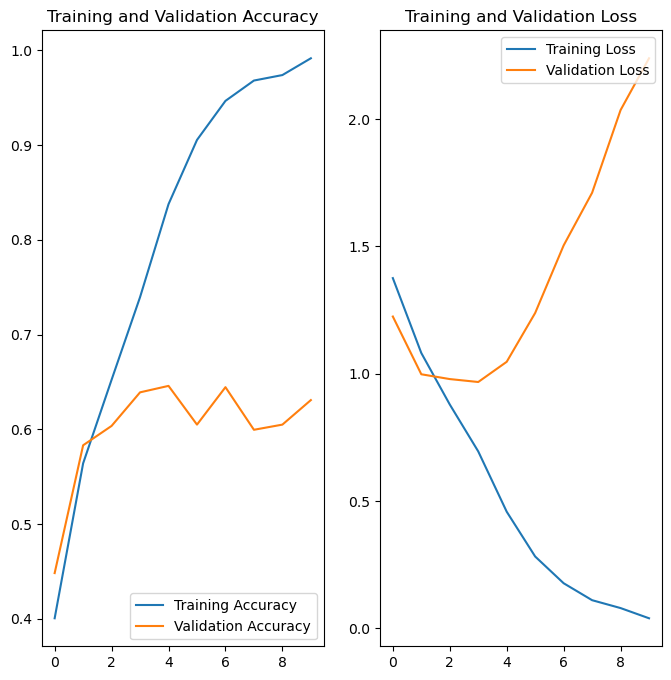

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4 style="color:#002f94ff">22. Creating a Data Augmentation Pipeline with Random Flip, Rotation, and Zoom</h4>

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

<h4 style="color:#002f94ff">23. Visualizing Augmented Images Generated from the Training Dataset</h4>

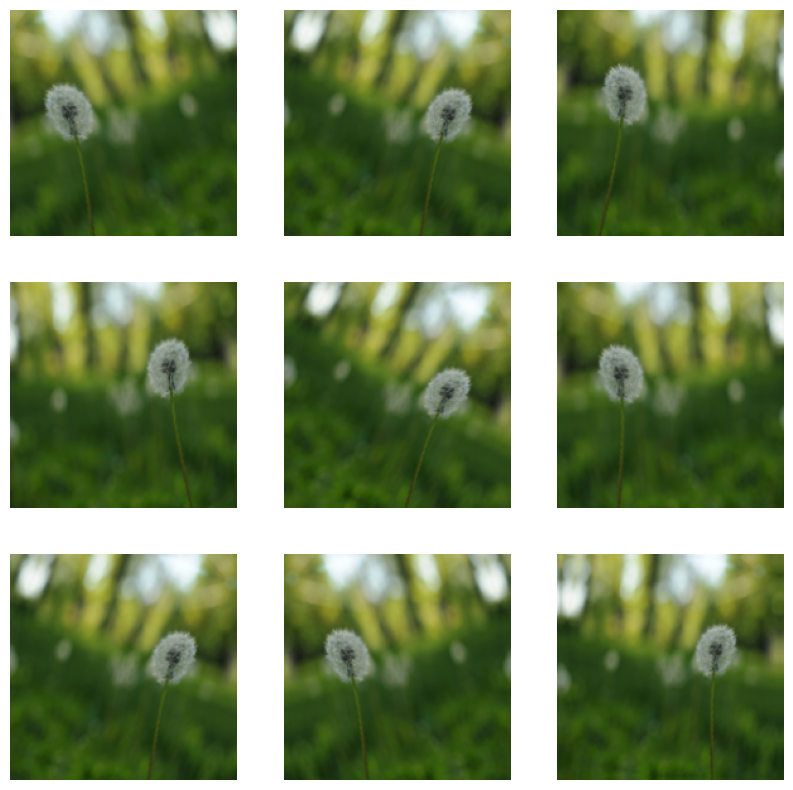

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

<h4 style="color:#002f94ff">24. Building an Enhanced CNN Model with Data Augmentation, Dropout, and Multiple Convolutional Layers for Flower Classification</h4>

In [35]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

<h4 style="color:#002f94ff">25. Compiling the Enhanced Flower Classification CNN Model with Adam Optimizer and Sparse Categorical Crossentropy Loss</h4>

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<h4 style="color:#002f94ff">26. Displaying the Summary of the Enhanced Flower Classification CNN Model Architecture</h4>

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

<h4 style="color:#002f94ff">27. Training the Enhanced Flower Classification CNN Model with Training and Validation Data</h4>

In [38]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4213 - loss: 1.3722 - val_accuracy: 0.5518 - val_loss: 1.0880
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.5586 - loss: 1.0736 - val_accuracy: 0.6226 - val_loss: 0.9801
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.6294 - loss: 0.9605 - val_accuracy: 0.6308 - val_loss: 0.9407
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.6437 - loss: 0.8946 - val_accuracy: 0.6458 - val_loss: 0.9718
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.6826 - loss: 0.8244 - val_accuracy: 0.6839 - val_loss: 0.8236
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7030 - loss: 0.7730 - val_accuracy: 0.6989 - val_loss: 0.7759
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7272 - loss: 0.7353 - val_accuracy: 0.6771 - val_loss: 0.8725
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7265 - loss: 0.7103 - val_accuracy: 0.7193 - v

<h4 style="color:#002f94ff">28. Plotting Training and Validation Accuracy and Loss for the Enhanced Flower Classification Model</h4>

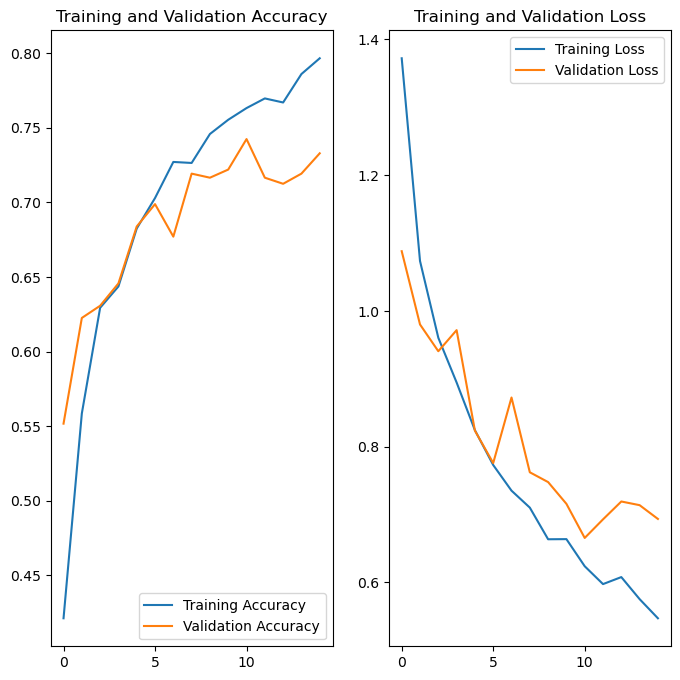

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4 style="color:#002f94ff">29. Making a Prediction on a New Sunflower Image Using the Trained Flower Classification Model</h4>

In [40]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
This image most likely belongs to sunflowers with a 97.09 percent confidence.
